<h1><center><font size="6">Code Analysis of positive cases of Coronavirus - Bucaramanga</font></center></h1>

In [ ]:
# Libraries
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pandas_profiling import ProfileReport
from simpledbf import Dbf5
import plotly.express as px
import psycopg2

from pandas_profiling import ProfileReport

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols
from sklearn.naive_bayes import CategoricalNB

%matplotlib inline

# Exploratory Data Analysis



In [ ]:
path = 'C:/Users/luz.vanegas/Documents/ds4a/'

In [ ]:
data_colombia = pd.read_excel(path+'_Datos Colombia.xlsx')
pd.set_option('display.max_rows', None)
data_colombia_buc = data_colombia.groupby('Ciudad de ubicación').size().reset_index()
data_colombia_buc = data_colombia_buc[data_colombia_buc['Ciudad de ubicación']== 'Bucaramanga']

In [ ]:
countrie = df_datos_buc.groupby(['País de procedencia','Sexo']).size().reset_index().rename(columns = {0:'count','País de procedencia':'Countrie of origin','Sexo':'Sex'})
countrie['Sex'] = countrie['Sex'].replace(['Masculino','Femenino'],['Male','Female'])
countrie['Countrie of origin'] = countrie['Countrie of origin'].replace(['ARABIA SAUDITA','BRASIL','ESTADOS UNIDOS','MÉXICO','ESPAÑA', 'REPÚBLICA DOMINICANA'],['Saudi Arabia','Brazil','USA','Mexico','Spain','Dominican Republic'])
px.bar(countrie, x='Countrie of origin', y='count',color = 'Sex')

*There's only eleven imported cases from the reported one in the infected of Bucaramanga. This could show us that there wasn't an impact to high of people from other countries, bringing the infection to this city.*

In [ ]:
day_week = df_datos_buc.groupby('Día semana').size().reset_index().rename(columns = {0:'count','Día semana':'Day of week'})
day_week['Day of week'] = day_week['Day of week'].replace(['domingo','jueves','lunes','martes','miércoles', 'sábado','viernes'],['Sunday','Thursday','Monday','Tuesday','Wednesday','Saturday','Friday'])
px.bar(day_week, x='Day of week', y='count')

*It seems like there is not a day of week with a significant higher number of the diagnosis. Even so, Sundays, there's not a lot of diagnosis of the illness*

In [ ]:
day = df_datos_buc.groupby('Día').size().reset_index().rename(columns = {0:'count','Día':'Day of month'})
px.bar(day, x='Day of month', y='count')

*There's some peaks for the 4th, 10th, 21th and 28th day, but we can't see any pattern here.*

In [ ]:
attention = df_datos_buc.groupby('Atención').size().reset_index().rename(columns = {0:'count','Atención':'Attention'})
attention['Attention'] = attention['Attention'].replace(['Casa','Fallecido','Hospital','Hospital UCI','Recuperado'],['Home','Deceased','Hospital','Hospital ICU','Recovered'])
print(attention)
px.bar(attention, x='Attention', y='count').show()
attention_sex = df_datos_buc.groupby(['Atención','Sexo']).size().reset_index().rename(columns = {0:'count','Atención':'Attention','Sexo':'Sex'})
attention_sex['Attention'] = attention_sex['Attention'].replace(['Casa','Fallecido','Hospital','Hospital UCI','Recuperado'],['Home','Deceased','Hospital','Hospital ICU','Recovered'])
attention_sex['Sex'] = attention_sex['Sex'].replace(['Masculino','Femenino'],['Male','Female'])
print(attention_sex)
px.bar(attention_sex, x='Attention', y='count', facet_col = 'Sex').show()

      Attention  count
0          Home   1503
1      Deceased    553
2      Hospital    444
3  Hospital ICU     40
4     Recovered  10211


      Attention     Sex  count
0          Home  Female    752
1          Home    Male    751
2      Deceased  Female    167
3      Deceased    Male    386
4      Hospital  Female    162
5      Hospital    Male    282
6  Hospital ICU  Female     17
7  Hospital ICU    Male     23
8     Recovered  Female   4774
9     Recovered    Male   5437


*According to the plot, the men are most affected and have more deaths that the women. And almost the double of men are hospitalized compared to the women. We should review if there is more men in Bucaramanga or really the men get ill more easily than women.*

In [ ]:
attention_age = df_datos_buc.groupby(['Sexo','Edad','Atención']).size().reset_index().rename(columns = {0:'count','Atención':'Attention','Edad':'Age','Sexo':'Sex'})
attention_age['Attention'] = attention_age['Attention'].replace(['Casa','Fallecido','Hospital','Hospital UCI','Recuperado'],['Home','Deceased','Hospital','Hospital ICU','Recovered'])
attention_age['Sex'] = attention_age['Sex'].replace(['Masculino','Femenino'],['Male','Female'])
attention_age_c = attention_age.pivot_table(index=attention_age['Age'], columns=[attention_age['Sex'],attention_age['Attention']], aggfunc=sum).fillna(0)
px.bar(attention_age, x='Age', y='count', color = 'Sex',facet_col="Attention",facet_col_wrap=3).update_yaxes(matches=None).show()

*The plor of recovered show that most of the recoveries are in the ages between 18 and 40 years. As the age increase, is less posible than the men get recovered.\
In the plot of deceased, we saw that most of the population here are older than 50 years, and the majority are men.\
Finally we saw too that most of the people that are atented in home, is youngest than 40 years, and we have more participation of women here.*

In [ ]:
status_age = df_datos_buc.groupby(['Sexo','Edad','Estado']).size().reset_index().rename(columns = {0:'count','Estado':'Status','Edad':'Age','Sexo':'Sex'})
status_age['Status'] = status_age['Status'].replace(['Leve','Moderado','Asintomático','Grave','Fallecido'],['Mild','Moderate','asymptomatic','Serious','Deceased'])
status_age['Sex'] = attention_age['Sex'].replace(['Masculino','Femenino'],['Male','Female'])
status_age_c = status_age.pivot_table(index=status_age['Age'], columns=[status_age['Sex'],status_age['Status']], aggfunc=sum).fillna(0)
px.bar(status_age, x='Age', y='count', color = 'Sex',facet_col="Status",facet_col_wrap=3).update_yaxes(matches=None).show()

**This data comes from the population census of the DANE**

In [ ]:
dane = pd.read_csv(path+'CNPV2018_5PER_A2_68.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dane.head()

TIPO_REG  U_DPTO  U_MPIO  UA_CLASE  COD_ENCUESTAS  U_VIVIENDA  P_NROHOG  \
0         5      68       1         1           2851           2       1.0   
1         5      68       1         1           2851           2       1.0   
2         5      68       1         1           2851           2       1.0   
3         5      68       1         1           2851           2       1.0   
4         5      68       1         1           2851           2       1.0   

   P_NRO_PER  P_SEXO  P_EDADR  P_PARENTESCOR  PA1_GRP_ETNIC  PA11_COD_ETNIA  \
0          1       1        8            1.0              6             NaN   
1          2       1        3            3.0              6             NaN   
2          3       1        2            3.0              6             NaN   
3          4       2        8            2.0              6             NaN   
4          5       2       15            4.0              6             NaN   

   PA12_CLAN  PA21_COD_VITSA  PA22_COD_KUMPA  PA_HABLA_LENG  PA1_ENTIENDE  \
0        NaN             NaN             NaN            NaN           NaN   
1        NaN             NaN             NaN            NaN           NaN   
2        NaN             NaN             NaN            NaN           NaN   
3        NaN             NaN             NaN            NaN           NaN   
4        NaN             NaN             NaN            NaN           NaN   

   PB_OTRAS_LENG  PB1_QOTRAS_LENG  PA_LUG_NAC  PA_VIVIA_5ANOS  PA_VIVIA_1ANO  \
0            NaN              NaN           1             3.0            2.0   
1            NaN              NaN           1             3.0            2.0   
2            NaN              NaN           1             3.0            2.0   
3            NaN              NaN           1             3.0            2.0   
4            NaN              NaN           1             3.0            2.0   

   P_ENFERMO  P_QUEHIZO_PPAL  PA_LO_ATENDIERON  PA1_CALIDAD_SERV  \
0        2.0             NaN               NaN               NaN   
1        2.0             NaN               NaN               NaN   
2        2.0             NaN               NaN               NaN   
3        2.0             NaN               NaN               NaN   
4        1.0             1.0               1.0               2.0   

   CONDICION_FISICA  P_ALFABETA  PA_ASISTENCIA  P_NIVEL_ANOSR  P_TRABAJO  \
0               2.0         1.0            2.0            8.0        1.0   
1               2.0         1.0            1.0            3.0        6.0   
2               2.0         1.0            1.0            2.0        NaN   
3               2.0         1.0            2.0            8.0        7.0   
4               1.0         2.0            2.0           10.0        8.0   

   P_EST_CIVIL  PA_HNV  PA1_THNV  PA2_HNVH  PA3_HNVM  PA_HNVS  PA1_THSV  \
0          2.0     NaN       NaN       NaN       NaN      NaN       NaN   
1          7.0     NaN       NaN       NaN       NaN      NaN       NaN   
2          NaN     NaN       NaN       NaN       NaN      NaN       NaN   
3          2.0     1.0       2.0       2.0       0.0      1.0       2.0   
4          6.0     1.0       7.0       3.0       4.0      2.0       NaN   

   PA2_HSVH  PA3_HSVM  PA_HFC  PA1_THFC  PA2_HFCH  PA3_HFCM  PA_UHNV  \
0       NaN       NaN     NaN       NaN       NaN       NaN      NaN   
1       NaN       NaN     NaN       NaN       NaN       NaN      NaN   
2       NaN       NaN     NaN       NaN       NaN       NaN      NaN   
3       2.0       0.0     2.0       NaN       NaN       NaN      1.0   
4       NaN       NaN     2.0       NaN       NaN       NaN      9.0   

   PA1_MES_UHNV  PA2_ANO_UHNV  
0           NaN           NaN  
1           NaN           NaN  
2           NaN           NaN  
3           8.0        2008.0  
4           NaN           NaN

In [ ]:
age = dane.groupby('P_EDADR').size().reset_index().rename(columns = {'P_EDADR':'Age',0:'No. Persons'})
px.bar(age, x='Age', y='No. Persons').show()

**Age in five-year groups\\

1 from 00 to 04 years\
2 from 05 to 09 years\
3 from 10 to 14 years\
4 from 15 to 19 years\
5 from 20 to 24 years\
6 from 25 to 29 years\
7 from 30 to 34 years\
8 from 35 to 39 years\
9 from 40 to 44 years\
10 from 45 to 49 years\
11 from 50 to 54 years\
12 from 55 to 59 years\
13 from 60 to 64 years\
14 from 65 to 69 years\
15 from 70 to 74 years\
16 from 75 to 79 years\
17 from 80 to 84 years\
18 from 85 to 89 years\
19 from 90 to 94 years\
20 from 95 to 99 years\
21 from 100 and more years**\\

*The highest number of persons in Bucaramanga's population, are in an interval of 20 to 24 years and from 70 years and ahead, the population decreased.*

In [ ]:
dane['P_SEXO'] = dane['P_SEXO'].apply(str)
age_sex = dane.groupby(['P_EDADR','P_SEXO']).size().reset_index().rename(columns = {'P_EDADR':'Age',0:'No. Persons','P_SEXO':'Sex'})
age_sex['Sex'] = age_sex['Sex'].replace(['1','2'],['Male','Female'])
age_sex_c = age_sex.pivot_table(index=age_sex['Age'], columns=[age_sex['Sex']], aggfunc=sum)
print(age_sex_c)
px.bar(age_sex, x='Age', y='No. Persons', color = 'Sex').show()

    No. Persons       
Sex      Female   Male
Age                   
1         65659  69337
2         71845  75427
3         76011  80071
4         79739  84576
5         85802  88300
6         81649  81459
7         75925  75240
8         74554  71999
9         67060  62098
10        67390  60305
11        66126  58325
12        57417  49735
13        46071  39570
14        35565  30964
15        27069  22212
16        20610  15797
17        14095  10006
18         8107   5349
19         3432   1927
20          984    562
21          292    180


In [ ]:
base = pd.read_excel(path+'BASE 24-09-2020 PARTE II.xlsx')
base.head(5)
#pd.crosstab([dane_vulnerability.LABEL],dane_vulnerability.Category, margins = False)

cod_eve    fec_not  semana   año     cod_pre  cod_sub  pri_nom_  seg_nom_  \
0      345 2020-08-02      32  2020  6800101018        1       NaN       NaN   
1      345 2020-08-05      32  2020  6800103726        1       NaN       NaN   
2      345 2020-08-04      32  2020  6800101018        1       NaN       NaN   
3      345 2020-08-03      32  2020  6800100431        1       NaN       NaN   
4      345 2020-08-04      32  2020  6800104885        1       NaN       NaN   

   pri_ape_  seg_ape_ tip_ide_    num_ide_  edad_  uni_med_  nacionali_  \
0       NaN       NaN       CC    27911002     95         1         170   
1       NaN       NaN       CC     2020284     86         1         170   
2       NaN       NaN       CC    63507193     45         1         170   
3       NaN       NaN       RC  1097124401      6         1         170   
4       NaN       NaN       RC  1097794741      3         2         170   

  nombre_nacionalidad sexo_  cod_pais_o  cod_dpto_o  cod_mun_o  area_  \
0            COLOMBIA     F         170          68          1      1   
1            COLOMBIA     M         170          68          1      1   
2            COLOMBIA     F         170          68          1      1   
3            COLOMBIA     M         170          68          1      1   
4            COLOMBIA     F         170          68          1      1   

    localidad_ cen_pobla_ vereda_                 bar_ver_  \
0          NaN        NaN     NaN             LA CONCORDIA   
1  BUCARAMANGA        NaN     NaN                  ALARCON   
2          NaN        NaN     NaN  9999999 SIN INFORMACION   
3          NaN        NaN     NaN            LOS COLORADOS   
4     PROVENZA        NaN     NaN                 PROVENZA   

                                        dir_res_  ocupacion_ tip_ss_ cod_ase_  \
0                             CARRERA 20 # 50-27        9996       C   EPS037   
1  AV QUEBRADA SECA  CARRERA 29 EDIFICIO FRANCIS        9995       C   EPS005   
2             CARRERA 37 # 35-57 BARRIO EL PRADO        9996       C   EPS002   
3                                  CRA 28A#50-19        9999       S   EPSS16   
4                               TRANSV 112 20 53        9999       C   EPS041   

   per_etn_  nom_grupo_  estrato_  gp_discapa  gp_desplaz  gp_migrant  \
0         6           0       3.0         2.0         2.0         2.0   
1         6           0       3.0         2.0         2.0         2.0   
2         6           0       5.0         2.0         2.0         2.0   
3         6           0       NaN         2.0         2.0         2.0   
4         6           0       NaN         2.0         2.0         2.0   

   gp_carcela  gp_gestan  sem_ges_  gp_indigen  gp_pobicbf  gp_mad_com  \
0         2.0        2.0       NaN         2.0         2.0         2.0   
1         2.0        NaN       NaN         2.0         2.0         NaN   
2         2.0        2.0       NaN         2.0         2.0         2.0   
3         2.0        NaN       NaN         2.0         2.0         NaN   
4         2.0        2.0       NaN         2.0         2.0         2.0   

   gp_desmovi  gp_psiquia  gp_vic_vio  gp_otros  fuente_  cod_pais_r  \
0         2.0         2.0         2.0         1        1         170   
1         2.0         2.0         2.0         1        1         170   
2         2.0         2.0         2.0         1        1         170   
3         2.0         2.0         2.0         1        1         170   
4         2.0         2.0         2.0         1        1         170   

   cod_dpto_r  cod_mun_r   fec_con_   ini_sin_  tip_cas_  pac_hos_ fec_hos_  \
0          68          1 2020-08-02 2020-08-02         1         2    -   -   
1          68          1 2020-08-04 2020-08-03         1         2    -   -   
2          68          1 2020-08-04 2020-08-02         1         2    -   -   
3          68          1 2020-08-03 2020-08-02         1         2    -   -   
4          68          1 2020-08-04 2020-08-02         1    

In [ ]:
base['asma'] = base['asma'].replace([2],[0])
base['epoc'] = base['epoc'].replace([2],[0])
base['diabetes'] = base['diabetes'].replace([2],[0])
base['vih'] = base['vih'].replace([2],[0])
base['enf_card'] = base['enf_card'].replace([2],[0])
base['cancer'] = base['cancer'].replace([2],[0])
base['malnutri'] = base['malnutri'].replace([2],[0])
base['obesidad'] = base['obesidad'].replace([2],[0])
base['ins_renal'] = base['ins_renal'].replace([2],[0])
base['otr_medinm'] = base['otr_medinm'].replace([2],[0])
base['fumador'] = base['fumador'].replace([2],[0])
base['otros_dc'] = base['otros_dc'].replace([2],[0])

In [ ]:
illness = ['asma','epoc','diabetes','vih','enf_card','cancer','malnutri','obesidad','ins_renal', 'otr_medinm','fumador','otros_dc']
illness_group = base.groupby(['sexo_'])[illness].sum().reset_index()
illness_group_co = pd.melt(illness_group, id_vars=['sexo_'], value_vars=illness).rename(columns={'sexo_':'Sex','variable':'comorbidity', 'value':'cases'})
illness_group_co['comorbidity'] = illness_group_co['comorbidity'].replace(['asma','epoc','diabetes','vih','enf_card','cancer','malnutri','obesidad','ins_renal', 'otr_medinm','fumador','otros_dc','cual_ot_dc'],['asthma','copd','diabetes','hiv','card_ill','cancer','malnutri','obesity','kidney failure', 'other med','Smokrt','another','anoher which'])
print(illness_group)
px.bar(illness_group_co, x='comorbidity', y='cases', facet_col = 'Sex').show()
illness_group = base.groupby(['sexo_'])[illness].sum().reset_index()

  sexo_  asma  epoc  diabetes  vih  enf_card  cancer  malnutri  obesidad  \
0     F    76    86        98   20        75      44      24.0        68   
1     M    76   124       121   29       105      33      30.0        61   

   ins_renal  otr_medinm  fumador  otros_dc  
0         32          22       30       271  
1         64          14       93       258  


*According to the plot, most of the positive cases, has different illness that the listed one. We should need to do NPL to understand the information in another cases.*

In [ ]:
base['sintomatico'] = base['sintomatico'].replace([2],[0])
base['tos'] = base['tos'].replace([2],[0])
base['fiebre'] = base['fiebre'].replace([2],[0])
base['dol_gar'] = base['dol_gar'].replace([2],[0])
base['rinorrea'] = base['rinorrea'].replace([2],[0])
base['conjuntivi'] = base['conjuntivi'].replace([2],[0])
base['cefalea'] = base['cefalea'].replace([2],[0])
base['dif_res'] = base['dif_res'].replace([2],[0])
base['diarrea'] = base['diarrea'].replace([2],[0])

In [ ]:
symptoms = ['sintomatico','tos','fiebre','dol_gar','rinorrea','conjuntivi','cefalea','dif_res','diarrea']
symptoms_group = base.groupby(['sexo_'])[symptoms].sum().reset_index()
symptoms_group_co = pd.melt(symptoms_group, id_vars=['sexo_'], value_vars=symptoms).rename(columns={'sexo_':'Sex','variable':'symptoms', 'value':'cases'})
symptoms_group_co['symptoms'] = symptoms_group_co['symptoms'].replace(['sintomatico','tos','fiebre','dol_gar','rinorrea','conjuntivi','cefalea','dif_res','diarrea'],['symptomatic','cough','fever','sore throat','rhinorrhea','conjunctivitis','headache','respiratory distress','diarrhea'])
print(symptoms_group)
px.bar(symptoms_group_co, x='symptoms', y='cases', facet_col = 'Sex').show()
symptoms_group = base.groupby(['sexo_'])[symptoms].sum().reset_index()

  sexo_  sintomatico  tos  fiebre  dol_gar  rinorrea  conjuntivi  cefalea  \
0     F         1106  881     664      426       273          17      292   
1     M         1219  979     819      425       251           9      249   

   dif_res  diarrea  
0      328       88  
1      431      124  


*Most of the people with positive cases of coronavirus, present symptoms, both men and women, mostly cough, fever and sore throat are observed, however, conjunctivitis does not seem to be such a common symptom of the disease in Bucaramanga.*

In [ ]:
neighborhood = base.groupby('bar_ver_').size().reset_index().sort_values(0, ascending = False).rename(columns = {'bar_ver_':'neighborhood',0:'cases'})
neighborhood = neighborhood.head(20)
px.bar(neighborhood, x='neighborhood', y='cases').show()

*It seems that the neighborhood information is not well filled out, so many data are observed without information, so that to identify the commune in which the case was generated, we will have to be fill this information by the reported address.*

In [ ]:
health_regimen = base.groupby('tip_ss_').size().reset_index().sort_values(0, ascending = False).rename(columns = {'tip_ss_':'health regimen',0:'cases'})
health_regimen = health_regimen.head(20)
health_regimen['health regimen'] = health_regimen['health regimen'].replace(['C','S','P','N','E','I'],['Contributory','subsidized','exception','Uninsured','Special','Without information'])
px.bar(health_regimen, x='health regimen', y='cases').show()

In [ ]:
dane = Dbf5(path+'VULNRB_IPMxMZ.dbf')
dane = dane.to_dataframe()
dane_buc = dane[dane['COD_MPIO']=='68001']
dane_buc.head(5)

COD_DPTO COD_MPIO                COD_DANE  CATEGORIA  \
381230       68    68001  6800110000000001010102        4.0   
381231       68    68001  6800110000000001010107        4.0   
381232       68    68001  6800110000000001010115        4.0   
381233       68    68001  6800110000000001010116        3.0   
381234       68    68001  6800110000000001010117        2.0   

                            LABEL   ipm  
381230        Vulnerabilidad baja   9.2  
381231        Vulnerabilidad baja   0.0  
381232        Vulnerabilidad baja  13.8  
381233  Vulnerabilidad media-alta  15.4  
381234  Vulnerabilidad media-baja  13.4

In [ ]:
    dane_vulnerability = dane.groupby(['CATEGORIA','LABEL'])['ipm'].mean().reset_index().rename(columns={'CATEGORIA':'Category', 'ipm':'MPI'})
    dane_vulnerability['LABEL'] = dane_vulnerability['LABEL'].replace(['Vulnerabilidad alta','Vulnerabilidad baja','Vulnerabilidad media','Vulnerabilidad media-alta','Vulnerabilidad media-baja'],['High vulnerability','Low vulnerability','Medium vulnerability','Medium-high vulnerability','Medium-low vulnerability'])
    px.bar(dane_vulnerability, x='Category', y='MPI', facet_col = 'LABEL',facet_col_wrap=3).update_yaxes(matches=None).show()
    pd.crosstab([dane_vulnerability.LABEL],dane_vulnerability.Category, margins = False)

Category                   1.0  2.0  3.0  4.0  5.0
LABEL                                             
High vulnerability           1    1    1    1    0
Low vulnerability            1    1    1    1    1
Medium vulnerability         1    1    1    0    1
Medium-high vulnerability    1    1    1    1    1
Medium-low vulnerability     1    1    1    1    0

*As the category increase, the multidimensional poverty index, tends to decrease. We saw this pattern in all labels, except in medium low vulnerability where we saw and increse of MPI in category 4.\*

In [ ]:
sis = pd.read_excel(path+"SISMUESTRAS 24092020.xlsx")
sis.head()

FechaMuestra               Departamento                  Municipio  \
0   2020-06-20  * PROCEDENCIA DESCONOCIDA  * PROCEDENCIA DESCONOCIDA   
1   2020-06-20  * PROCEDENCIA DESCONOCIDA  * PROCEDENCIA DESCONOCIDA   
2   2020-06-17  * PROCEDENCIA DESCONOCIDA  * PROCEDENCIA DESCONOCIDA   
3   2020-06-17  * PROCEDENCIA DESCONOCIDA  * PROCEDENCIA DESCONOCIDA   
4   2020-06-16                  SANTANDER                      GIRON   

          TipoDocumento   Documento                            Evento  \
0  Cédula de ciudadania    22212365  INFLUENZA HUMANA POR VIRUS NUEVO   
1  Cédula de ciudadania  1125474615  INFLUENZA HUMANA POR VIRUS NUEVO   
2  Cédula de ciudadania  1143133867  INFLUENZA HUMANA POR VIRUS NUEVO   
3  Cédula de ciudadania    55221221  INFLUENZA HUMANA POR VIRUS NUEVO   
4  Cédula de ciudadania    63492996  INFLUENZA HUMANA POR VIRUS NUEVO   

                                  IPS_Envia  PrimerNombre  SegundoNombre  \
0     SERVICIOS SALUD IPS SURA SURAMERICANA           NaN            NaN   
1     SERVICIOS SALUD IPS SURA SURAMERICANA           NaN            NaN   
2     SERVICIOS SALUD IPS SURA SURAMERICANA           NaN            NaN   
3     SERVICIOS SALUD IPS SURA SURAMERICANA           NaN            NaN   
4  MEDICINA Y TERAPIAS DOMICILIARIAS S.A.S.           NaN            NaN   

   PrimerApellido  SegundoApellido      FechaNacimiento  Edad       Sexo  \
0             NaN              NaN  1984-08-08 00:00:00  35.0   Femenino   
1             NaN              NaN  1995-01-01 00:00:00  25.0  Masculino   
2             NaN              NaN  1992-04-21 00:00:00  28.0  Masculino   
3             NaN              NaN  1981-11-30 00:00:00  39.0   Femenino   
4             NaN              NaN  1974-08-14 00:00:00  45.0   Femenino   

  Condicion_Final            EAPB Pais_Residencia Departamento_Residencia  \
0            VIVO       NUEVA EPS        COLOMBIA               ANTIOQUIA   
1             NaN       NUEVA EPS             NaN                     NaN   
2             NaN        SURA EPS             NaN                     NaN   
3             NaN        SURA EPS             NaN                     NaN   
4            VIVO  SANITAS EPS SA        COLOMBIA               SANTANDER   

  Municipio_Residencia                             Direccion    Telefono  \
0              ITUANGO               Campamento HidroItuango  3106611624   
1                  NaN                          HIDROITUANGO  3108356728   
2                  NaN  CALLE 33C#15-04 MANZANA 2 TORRE 6 A   3162902102   
3                  NaN                    CRA 25 A N 86-119   3015933769   
4                GIRON                         CR 25 N 30-32  3006015830   

  Trabajador_Salud Contacto_Caso_Confirmado          EstadoCaso  \
0               NO                       NO  RESULTADO_GENERADO   
1               NO                       NO  RESULTADO_GENERADO   
2               NO                       NO  RESULTADO_GENERADO   
3               NO                       NO  RESULTADO_GENERADO   
4               NO                       NO  RESULTADO_GENERADO   

   GenerarResultado  FiltroUsuario Tipo_Prueba Resultado  \
0                 1          29672      RT-PCR  POSITIVO   
1                 1          29672      RT-PCR  NEGATIVO   
2                 1          29672      RT-PCR  POSITIVO   
3                 1          29672      RT-PCR  NEGATIVO   
4                 1          57953      RT-PCR  NEGATIVO   

                                       Observaciones  IdEAPBFiltro  \
0                                                            226.0   
1                                                            226.0   
2                                                            200.0   
3                                                            200.0   
4  TÉCNICA: Reacción en Cadena de la Polimerasa o...         195.0   

   IdMunicipioFiltro  IdDepartamentoFiltro  \
0               1423                   NaN   
1               142

                                          count
Resultado                                      
EN PROCESAMIENTO                              8
INDETERMINADO                               206
NEGATIVO                                  83712
NO PROCESADAS POR FALLAS PRE-ANALITICAS      80
POSITIVO                                  29582
AxesSubplot(0.125,0.125;0.775x0.755)


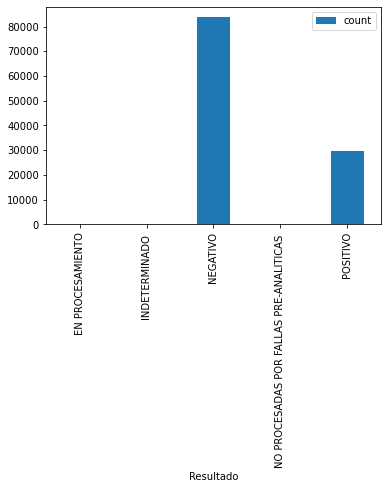

In [ ]:
print(sis.groupby("Resultado").size().to_frame("count"))
print(sis.groupby("Resultado").size().to_frame("count").plot(kind='bar', stacked=True))

*As we expect most of the tests to be negative. we are going to use only the positives and negatives and discard the rest as they are not significant.*

In [ ]:
%matplotlib inline
pol = sis[["EAPB","Resultado"]][sis["Resultado"].isin(["POSITIVO","NEGATIVO"])]

In [ ]:
pol = pol.groupby(["Resultado","EAPB"]).size().to_frame("count").reset_index()
pol["count"] = pol.apply(lambda x : -x["count"] if x["Resultado"] == "NEGATIVO" else x["count"],  axis=1)
pol.pivot(index="EAPB",columns="Resultado", values="count").sort_values(["POSITIVO","NEGATIVO"], ascending=False).head()

Resultado           NEGATIVO  POSITIVO
EAPB                                  
NUEVA EPS           -11240.0    4200.0
SALUD TOTAL SA EPS   -7337.0    3564.0
SANITAS EPS SA      -10294.0    3437.0
SURA EPS             -7198.0    2253.0
ECOPETROL            -7897.0    2014.0

*I converted negative results into negative numbers to obtain the following table:

We can the EPS that send the most tests to be processed and the distribution of positive and negative results.*

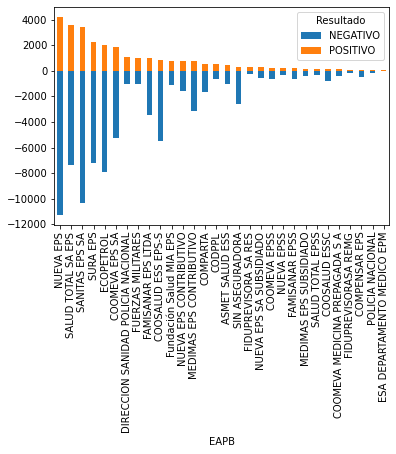

In [ ]:
pol.pivot(index="EAPB",columns="Resultado", values="count").sort_values(["POSITIVO","NEGATIVO"], ascending=False).head(30).plot(kind='bar', stacked=True);

In [ ]:
sexo = sis[["Sexo","Resultado"]][sis["Resultado"].isin(["POSITIVO","NEGATIVO"]) ]
sexo.dropna(inplace=True)
sexo = sexo.groupby(["Resultado","Sexo"]).size().to_frame("count").reset_index()
sexo["count"] = sexo.apply(lambda x : -x["count"] if x["Resultado"] == "NEGATIVO" else x["count"],  axis=1)

<Figure size 1440x432 with 0 Axes>

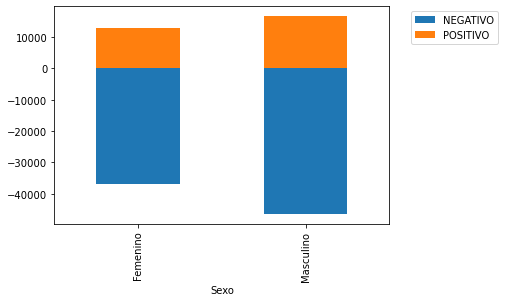

In [ ]:
plt.figure(figsize=(20,6))
sexo.pivot(index="Sexo",columns="Resultado", values="count").plot(kind='bar', stacked=True);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We see more tests are processed in men than in women, and the distribution of negatives and positives is similar.

In [ ]:
edad = sis[["Edad","Resultado"]][sis["Resultado"].isin(["POSITIVO","NEGATIVO"]) ]
edad.dropna(inplace=True)
edad = edad.groupby(["Resultado","Edad"]).size().to_frame("count").reset_index()
edad["count"] = edad.apply(lambda x : -x["count"] if x["Resultado"] == "NEGATIVO" else x["count"],  axis=1)
edad = edad[edad["Edad"] < 100]

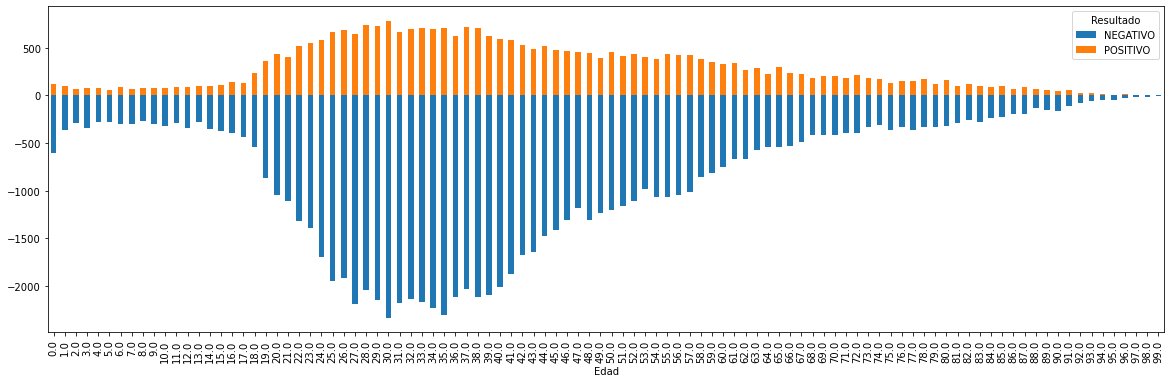

In [ ]:
edad.pivot(index="Edad",columns="Resultado", values="count").plot(kind='bar', stacked=True,figsize=(20,6));
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 
This graph gives us important information about at what age the most tests are performed and at what age the majority of positive cases are.

The age of greatest testing is 30's, and 20's to 50's are the ages with the most positive tests.

In [ ]:
fecha = sis[["FechaMuestra","Resultado"]][sis["Resultado"].isin(["POSITIVO","NEGATIVO"]) ]
fecha['FechaMuestra'] = fecha['FechaMuestra'].dt.strftime('%m-%d-%Y')
fecha.dropna(inplace=True)
fecha = fecha.groupby(["Resultado","FechaMuestra"]).size().to_frame("count").reset_index()
fecha = fecha[fecha["count"] > 1]

#fecha["count"] = fecha.apply(lambda x : -x["count"] if x["Resultado"] == "NEGATIVO" else x["count"],  axis=1)

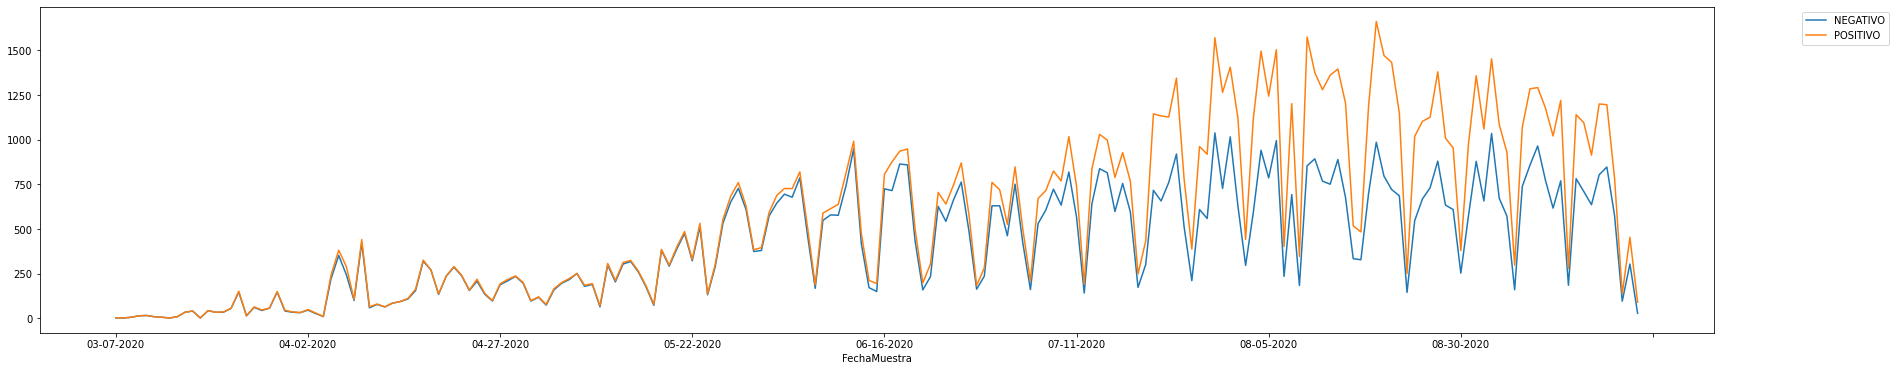

In [ ]:
import matplotlib.dates as mdates
fecha.pivot(index="FechaMuestra",columns="Resultado", values="count").plot(  stacked=True,figsize=(30,6));
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

In this graph we see how the testing and COVID19 cases behave on the timeline. The first cases begin in March 2020 and have a growth trend during the year with high and low peaks until September, where the number of tests is seen as low.

this means whether the the infected is dead or alive 

In [ ]:
sis.groupby("Condicion_Final").size().to_frame("count")

count
Condicion_Final       
MUERTO             442
SIN DATO             1
VIVO             97945

We see that there are 3 possible values:

* Dead
* Alive
* No Data

In [ ]:
condicion_esp = sis[["EAPB","Condicion_Final"]][sis["Condicion_Final"].isin(["MUERTO","VIVO"]) ]
condicion_esp.dropna(inplace=True)
condicion_esp = condicion_esp.groupby(["Condicion_Final","EAPB"]).size().to_frame("count").reset_index()

condicion_esp = condicion_esp.pivot(index="EAPB",columns="Condicion_Final", values="count").sort_values(["MUERTO","VIVO"], ascending=False)
condicion_esp.head()

Condicion_Final     MUERTO     VIVO
EAPB                               
NUEVA EPS             62.0  14196.0
SIN ASEGURADORA       57.0   2484.0
SALUD TOTAL SA EPS    40.0  10095.0
COOSALUD ESS EPS-S    25.0   6045.0
SANITAS EPS SA        17.0  12924.0

*This table shows us interesting information, the number of deaths and lives due to EPS. The first data that surprises me is the number of deaths, from the EPS category "WITHOUT INSURANCE," which seems to have a low amount of evidence, but high mortality.*

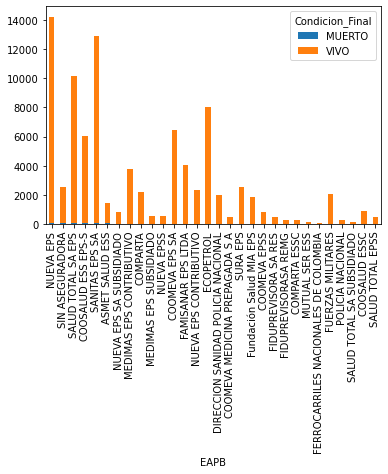

In [ ]:
condicion_esp.head(30).plot(kind='bar', stacked=True)

*Due to the large difference in number of deaths and people alive, this chart does not work. So it would be a good idea to make a graph of the percentage of Deaths.*

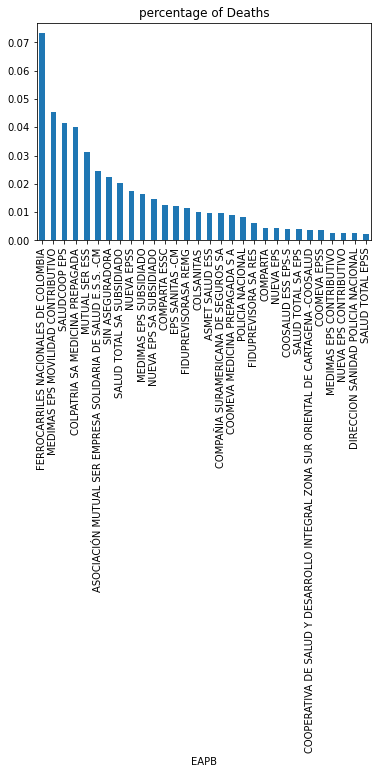

In [ ]:
condicion_esp["%MUERTO"] = condicion_esp["MUERTO"] / (condicion_esp["MUERTO"] +condicion_esp["VIVO"] )
condicion_esp["%MUERTO"].sort_values(ascending=False).head(30).plot(kind='bar', stacked=True, title="percentage of Deaths")

Here we see the EPS with the highest mortality, the first is  FERROCARRILES NACIONALES, WITHOUT INSURANCE is in sixth place.

**Final Condition by Sex:** 

In [ ]:
condicion_esp = sis[["Sexo","Condicion_Final"]][sis["Condicion_Final"].isin(["MUERTO","VIVO"]) ]
condicion_esp.dropna(inplace=True)
condicion_esp = condicion_esp.groupby(["Condicion_Final","Sexo"]).size().to_frame("count").reset_index()
condicion_esp = condicion_esp.pivot(index="Sexo",columns="Condicion_Final", values="count").sort_values(["MUERTO","VIVO"], ascending=False)
condicion_esp.head()

Condicion_Final  MUERTO   VIVO
Sexo                          
Masculino           272  55752
Femenino            167  41665

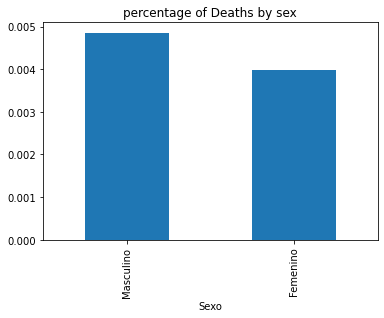

In [ ]:
condicion_esp["%MUERTO"] = condicion_esp["MUERTO"] / (condicion_esp["MUERTO"] +condicion_esp["VIVO"] )
condicion_esp["%MUERTO"].sort_values(ascending=False).head(30).plot(kind='bar', stacked=True, title="percentage of Deaths by sex")

*It seems that the mortality rate between men and women is not very different, it is less than 0.1% of difference.*

In [ ]:
sis.groupby("Tipo_Prueba").size().to_frame("count")  

count
Tipo_Prueba                                               
RT PCR para SARS CoV 2 (COVID 19) en cortes de ...       9
RT PCR para SARS CoV 2 (COVID 19) en muestra re...    1496
RT PCR para SARS CoV 2 (COVID 19) en suero               1
RT PCR para SARS Cov 2(COVID 19) en muestra res...       2
RT-PCR                                              112080

In [ ]:
tipo_prueba = sis[["Tipo_Prueba","Resultado"]][sis["Resultado"].isin(["POSITIVO","NEGATIVO"]) ]
tipo_prueba.dropna(inplace=True)
tipo_prueba = tipo_prueba.groupby(["Resultado","Tipo_Prueba"]).size().to_frame("count").reset_index()
tipo_prueba = tipo_prueba.pivot(index="Tipo_Prueba",columns="Resultado", values="count").sort_values(["POSITIVO","NEGATIVO"], ascending=False)
tipo_prueba.head()

Resultado                                           NEGATIVO  POSITIVO
Tipo_Prueba                                                           
RT-PCR                                                 82311     29497
RT PCR para SARS CoV 2 (COVID 19) en muestra re...      1392        83
RT PCR para SARS CoV 2 (COVID 19) en cortes de ...         8         1
RT PCR para SARS Cov 2(COVID 19) en muestra res...         1         1

*It is interesting to see the results by the type of test, due to the difference in number of tests the following graph is not very telling, so we will look at the percentage between positives and negatives.*

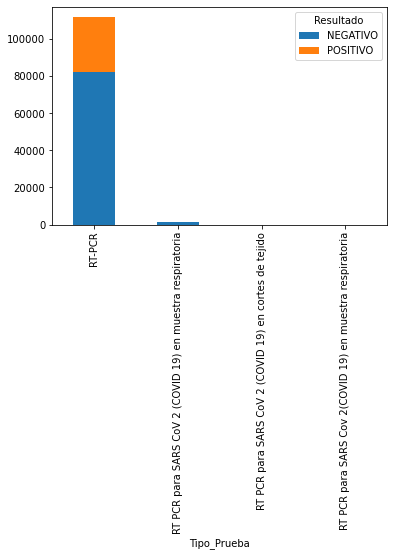

In [ ]:
tipo_prueba.plot(kind='bar', stacked=True)

In [ ]:
tipo_prueba["Porcentaje_pos"] = tipo_prueba["POSITIVO"] / (tipo_prueba["POSITIVO"] + tipo_prueba["NEGATIVO"])
tipo_prueba["Porcentaje_neg"] = 1 - tipo_prueba["Porcentaje_pos"] 
tipo_prueba

Resultado                                           NEGATIVO  POSITIVO  \
Tipo_Prueba                                                              
RT-PCR                                                 82311     29497   
RT PCR para SARS CoV 2 (COVID 19) en muestra re...      1392        83   
RT PCR para SARS CoV 2 (COVID 19) en cortes de ...         8         1   
RT PCR para SARS Cov 2(COVID 19) en muestra res...         1         1   

Resultado                                           Porcentaje_pos  \
Tipo_Prueba                                                          
RT-PCR                                                    0.263818   
RT PCR para SARS CoV 2 (COVID 19) en muestra re...        0.056271   
RT PCR para SARS CoV 2 (COVID 19) en cortes de ...        0.111111   
RT PCR para SARS Cov 2(COVID 19) en muestra res...        0.500000   

Resultado                                           Porcentaje_neg  
Tipo_Prueba                                                         
RT-PCR                                                    0.736182  
RT PCR para SARS CoV 2 (COVID 19) en muestra re...        0.943729  
RT PCR para SARS CoV 2 (COVID 19) en cortes de ...        0.888889  
RT PCR para SARS Cov 2(COVID 19) en muestra res...        0.500000

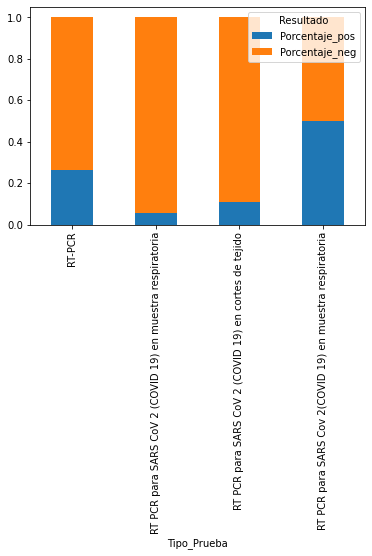

In [ ]:
tipo_prueba[["Porcentaje_pos", "Porcentaje_neg"]].plot(kind='bar', stacked=True)

*Here we can see that while the positivity rate of RT-PCR tests is almost 30%, the highest positivity rate is that of **RT PCR for SARS CoV 2 (COVID 19) in respiratory sample** with 50%. It would be interesting to find the reason for its high positive rate.*

# Modeling

## Logistic Regression


*The following is used to construct and implement a supervised classification model of deceased people based on their comorbilities.*

In [ ]:
# Import required libraries
import os
from pydoc import help
import pandas as pd
import numpy as np
import plotly.express as px
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import mca

%matplotlib inline

*The database "BASE 2409-2020 PARTE II.xlsx" consists of all recorded cases of COVID up to the 24th of september. This database will be used to train the classification models. The later database which has records up to the 27th of october will be used as the test set to test the performance and predictive capalibities of the models.*

In [ ]:
#Load db of positive cases
nombre='BASE 24-09-2020 PARTE II.xlsx'
casos_positivos = pd.read_excel(directorio+nombre, 
                                  sheet_name= 'Casos Positivos') \
                          .drop(['pri_nom_', 'seg_nom_', 'pri_ape_','seg_ape_'], axis = 1) \
                          .replace("Recuperado_tiempo","Recuperado")

*As there are separate records of the antecedents of all the people who have been tested and those who had a positive result, discriminated by events (ESI - SARI (CENTINAL SURVEILLANCE), NEW VIRUS ANGER and ACUTE RESPIRATORY INFECTION SEVERE UNUSED SARI), the data sets were combined and some variables were taken, in order to perform cross-tables, as well as some simple and multiple correspondence analysis.*

In [ ]:
#Load db of comorbilities, join to positive cases' db, 
#select relevant columns and remove duplicates
df_346 = pd.read_excel(directorio+nombre, sheet_name='346-348')
casos_2=pd.merge(casos_2,df_346,
                  left_on="Identificacion",
                  right_on="num_ide_",
                  how="left") \
                  .loc[:,["Identificacion","Egreso",
                          "asma","epoc","diabetes",
                          "cancer","obesidad","fumador",
                          "ins_renal","enf_card","Edad","Fecha"]] \
                          .drop_duplicates()

*To find relationships between some of the Covid-positive patients' medical histories and their discharge status, we omit the missing values.*

In [ ]:
#Replace empty strings for NaN and then drop all NaNs
nan_value = float("NaN")
casos_2.replace("", nan_value, inplace=True)
casos_2.dropna(inplace=True)

Identificacion      Egreso  asma  epoc  diabetes  cancer  obesidad  fumador  \
0       37751097  Recuperado   2.0   2.0       2.0     2.0       2.0      2.0   
2       63360358  Recuperado   2.0   2.0       2.0     2.0       2.0      2.0   
3     1098626164  Recuperado   2.0   2.0       2.0     2.0       2.0      2.0   
4       27929676  Recuperado   2.0   2.0       2.0     2.0       1.0      2.0   
5       19462075  Recuperado   2.0   2.0       2.0     2.0       2.0      2.0   

   ins_renal  enf_card  Edad  
0        2.0       2.0  39.0  
2        2.0       2.0  49.0  
3        2.0       2.0  33.0  
4        2.0       2.0  80.0  
5        2.0       2.0  58.0

In [ ]:
#After removing NaNs and duplicates, remove "identificacion" column
casos_3=casos_2.drop(['Identificacion'], axis = 1)

### Multiple Correspondence Analysis

In [ ]:
acm=prince.MCA(n_components=20)
acm.fit(casos_3)
nuevabase=acm.fit_transform(casos_3)

In [ ]:
np.cumsum(acm.explained_inertia_)

array([0.24564275, 0.3383955 , 0.3921817 , 0.39406581, 0.39559172,
       0.39675828, 0.39752699, 0.39806668, 0.39848482, 0.39882846,
       0.39892688, 0.39892688])

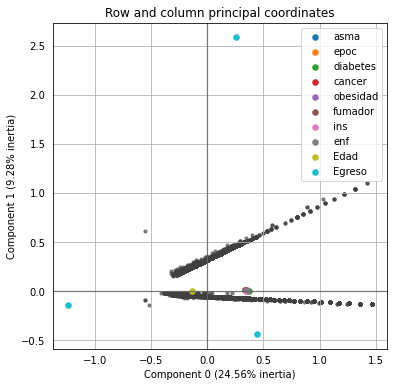

In [ ]:
acm.plot_coordinates(casos_3)

In [ ]:
acm.column_coordinates(casos_3)

0         1         2         3         4         5  \
asma               0.332050  0.008836  0.038057  0.020829  0.046888 -0.064627   
epoc               0.348785  0.006489  0.034829  0.014775  0.008002  0.017018   
diabetes           0.369555  0.005712  0.029573  0.010235 -0.082069 -0.030158   
cancer             0.339250  0.006863  0.036640  0.011533  0.007899  0.012679   
obesidad           0.350332  0.005395  0.030789 -0.100496  0.005632 -0.003955   
fumador            0.339259  0.007745  0.037724  0.012049  0.014271  0.023724   
ins_renal          0.343266  0.006025  0.032712  0.011942 -0.001288  0.011896   
enf_card           0.354268  0.008082  0.032239  0.014071  0.000811  0.027413   
Edad              -0.135600 -0.002713 -0.013427 -0.000034 -0.000220  0.000010   
Egreso_Fallecido  -1.241390 -0.142101  3.545453  0.003507 -0.003110  0.010214   
Egreso_Pendiente   0.255093  2.582185 -0.089601  0.007871  0.005633  0.010003   
Egreso_Recuperado  0.440064 -0.436350 -0.145817  0.009037  0.007103  0.009731   

                          6         7         8             9        10  \
asma              -0.005885 -0.005429 -0.000902  1.103473e-03 -0.000857   
epoc               0.004015  0.024732 -0.039040  3.052963e-03 -0.002561   
diabetes           0.004543 -0.005093 -0.002901 -2.594181e-03 -0.000291   
cancer             0.005904  0.020693  0.019868 -3.200475e-02 -0.005282   
obesidad          -0.001384 -0.000367 -0.001114  3.295023e-04 -0.000598   
fumador            0.041907 -0.035184 -0.001175  1.295625e-03 -0.001927   
ins_renal          0.001860  0.018878  0.023812  3.179402e-02 -0.003708   
enf_card          -0.052553 -0.022742 -0.000721 -1.689506e-03 -0.000976   
Edad              -0.000045 -0.000017 -0.000036  7.992248e-07 -0.000012   
Egreso_Fallecido   0.001300  0.008981  0.004873 -1.381533e-03  0.032068   
Egreso_Pendiente   0.004733  0.009305  0.005380 -2.502405e-03  0.032609   
Egreso_Recuperado  0.004615  0.008859  0.005416 -2.662355e-03  0.032687   

                         11  
asma              -0.357616  
epoc              -0.357616  
diabetes          -0.357616  
cancer            -0.357616  
obesidad          -0.357616  
fumador           -0.357616  
ins_renal         -0.357616  
enf_card          -0.357616  
Edad              -0.357616  
Egreso_Fallecido  -0.357616  
Egreso_Pendiente  -0.357616  
Egreso_Recuperado -0.357616

*This plot helps to identify variables that are the most correlated with each dimension. The squared correlations between variables and the dimensions are used as coordinates. It can be seen that, the presence of COPD, diabetes and asthma are related to a recovered discharge. On the other hand, the presence of obesity and the condition of smokers are related to death. To corroborate this, a simple correspondence analysis is performed.*

In [ ]:
Tabla1=pd.crosstab(casos_2.Egreso,casos_2.diabetes)
Tabla1

diabetes    0.0  1.0   2.0
Egreso                    
Fallecido     0  124   366
Pendiente     1  100  1369
Recuperado    3  363  7998

In [ ]:
acs=prince.CA(n_components=5)
Tabla1.columns.rename("Diabetes",inplace=True)
Tabla1.index.rename("Egreso",inplace=True)
ca=acs.fit(Tabla1)

In [ ]:
ca.plot_coordinates(Tabla1)

In [ ]:
Tabla2=pd.crosstab(casos_2.Egreso,casos_2.obesidad)
Tabla2

obesidad    0.0  1.0   2.0
Egreso                    
Fallecido     0   78   412
Pendiente     1   94  1375
Recuperado    3  364  7997

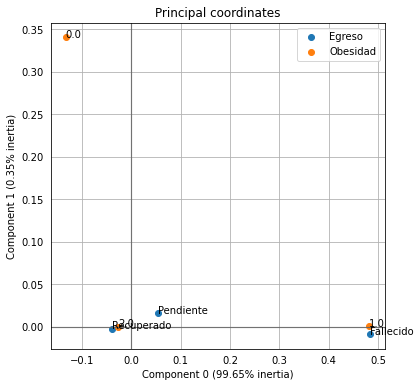

In [ ]:
acs=prince.CA(n_components=5)
Tabla2.columns.rename("Obesidad",inplace=True)
Tabla2.index.rename("Egreso",inplace=True)
ca2=acs.fit(Tabla2)
ca2.plot_coordinates(Tabla2)

In [ ]:
Tabla3=pd.crosstab(casos_2.Egreso,casos_2.epoc)
Tabla3

epoc        0.0  1.0   2.0
Egreso                    
Fallecido     0   54   436
Pendiente     1   35  1434
Recuperado    3   99  8262

In [ ]:
acs=prince.CA(n_components=5)
Tabla3.columns.rename("epoc",inplace=True)
Tabla3.index.rename("Egreso",inplace=True)
ca3=acs.fit(Tabla3)
ca3.plot_coordinates(Tabla3)

In [ ]:
casos_4=casos_3.copy()[["Egreso","diabetes","epoc"]]
acm2=prince.MCA(n_components=20)
acm2.fit(casos_4)
np.cumsum(acm2.explained_inertia_)

array([0.32742681, 0.63498166, 0.64156977, 0.64308493, 0.64308493])

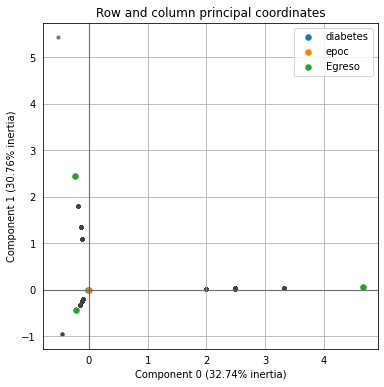

In [ ]:
acm2.plot_coordinates(casos_4)

In [ ]:
acm2.column_coordinates(casos_4)

0         1         2         3         4
diabetes          -0.011311 -0.002537 -0.081577 -0.004371 -0.305682
epoc               0.003170  0.000478  0.059885 -0.025990 -0.305682
Egreso_Fallecido   4.658479  0.054085  0.027717  0.056187 -0.305682
Egreso_Pendiente  -0.244138  2.456881  0.038996  0.059615 -0.305682
Egreso_Recuperado -0.210638 -0.430059  0.040675  0.060262 -0.305682

### Logistic Regression Model

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as sfm

from matplotlib.widgets import Slider, Button, RadioButtons
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from statsmodels.formula.api import ols

In [ ]:
df = casos_3.copy()
#Remove entries with "Egreso" value as "Pendiente"
df=df.loc[df.Egreso!="Pendiente"]

#Change "Egreso" variable to numeric (0/1)
df["Egreso_Num"]=df["Egreso"].apply(lambda label:0 if label=="Recuperado" else 1)
df.drop(columns=["Egreso"],inplace=True)

#Remove rows which have value of comorbilities in zero (instead of 1 or 2)
df = df[df["asma"]!=0]

#Change numeric variables to categorical (except "edad" and "fecha")
for col in df.columns[0:8]:
  df[col] = df[col].apply(lambda num : 0 if num==2 else num) \
                                    .astype("category")
df["Egreso_Num"] = df["Egreso_Num"].astype("category")

#Agregar variable "Intercept" para los modelos
df["Intercept"]=1

(10324, 10)
(8854, 10)


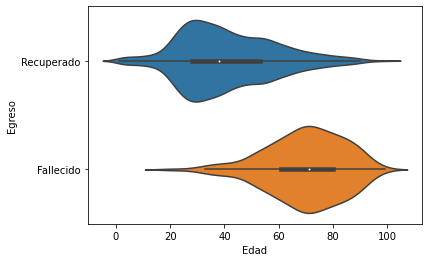

In [ ]:
sns.violinplot(x='Edad', y='Egreso', data=df)

*According to the previous graph, the deceased tend to be older than those recovered, so a transformation will be made on the age variable, in order to obtain interpretations that may be of interest.*

In [ ]:
df[["Egreso","Edad"]].groupby("Egreso")[["Edad"]].describe()

Edad                                                    
             count       mean        std   min   25%   50%   75%   max
Egreso                                                                
Fallecido    490.0  69.704082  14.388851  19.0  61.0  71.0  80.0  99.0
Recuperado  8364.0  41.068388  17.829379   1.0  28.0  38.0  53.0  99.0

*Since the average age of the deceased is approximately 70 years, we will subtract 70 from the age variable.*

In [ ]:
casos_sept["Edad_2"]=casos_sept["Edad"]-70

*Training of logistic regression model:*

In [ ]:
logit = sm.Logit(casos_sept['Egreso_Num'], 
                 casos_sept.drop("Egreso_Num", axis=1))
logit_res = logit.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.146006
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Egreso_Num   No. Observations:                 8854
Model:                          Logit   Df Residuals:                     8844
Method:                           MLE   Df Model:                            9
Date:                Sat, 14 Nov 2020   Pseudo R-squ.:                  0.3176
Time:                        20:22:14   Log-Likelihood:                -1292.7
converged:                       True   LL-Null:                       -1894.4
Covariance Type:            nonrobust   LLR p-value:                2.438e-253
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.0513      0.068    -30.212      0.000      -2.184      -1.918
Edad_2            0.0797      0.003     23.355      0.000       0.073       0.086
asma_1.0         -0.3025      0.399     -0.758      0.448      -1.085       0.479
epoc_1.0          0.2262      0.207      1.093      0.274      -0.179       0.632
diabetes_1.0      0.6057      0.140      4.329      0.000       0.331       0.880
cancer_1.0        0.8450      0.327      2.583      0.010       0.204       1.486
obesidad_1.0      1.4614      0.162      9.040      0.000       1.145       1.778
fumador_1.0       0.4896      0.311      1.574      0.116      -0.120       1.099
ins_renal_1.0     1.2930      0.245      5.281      0.000       0.813       1.773
enf_card_1.0      0.4766      0.171      2.781      0.005       0.141       0.813
=================================================================================
"""

*According to the results of this model,  the variables asthma, copd and being a smoker are not significant. Therefore, they will be excluded.*

In [ ]:
#Rerun model omitting asthma, copd and smoker variables
df_log = casos_sept[['Intercept',
                      'Edad_2', 
                      'diabetes',
                      'cancer', 
                      'obesidad', 
                      'ins_renal', 
                      'enf_card']]
                      
logit2 = sm.Logit(casos_sept['Egreso_Num'], df_log)
logit2_res = logit2.fit()
logit2_prediction = logit2_res.predict(df_log)
logit2_res.summary()

Optimization terminated successfully.
         Current function value: 0.146255
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Egreso_Num   No. Observations:                 8854
Model:                          Logit   Df Residuals:                     8847
Method:                           MLE   Df Model:                            6
Date:                Sat, 14 Nov 2020   Pseudo R-squ.:                  0.3164
Time:                        20:23:10   Log-Likelihood:                -1294.9
converged:                       True   LL-Null:                       -1894.4
Covariance Type:            nonrobust   LLR p-value:                8.648e-256
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.0284      0.066    -30.812      0.000      -2.157      -1.899
Edad_2            0.0804      0.003     24.058      0.000       0.074       0.087
diabetes_1.0      0.6026      0.140      4.317      0.000       0.329       0.876
cancer_1.0        0.8621      0.324      2.662      0.008       0.227       1.497
obesidad_1.0      1.4575      0.161      9.027      0.000       1.141       1.774
ins_renal_1.0     1.3141      0.244      5.380      0.000       0.835       1.793
enf_card_1.0      0.5144      0.168      3.058      0.002       0.185       0.844
=================================================================================
"""

+ Suppose you have a 70-year-old patient with no history of diabetes, cancer, obesity, kidney failure, or heart disease who was diagnosed with COVID-19. For this patient, it is estimated that the probability that he dies from COVID is $\exp\{-2.0283\} = 0.1516$ times the probability that he recovers. Otherwise, it can be said that the probability that this patient dies from COVID-19 is 11.626%

+ Leaving the other variables fixed, the risk that a patient with COVID-19 dies, for a patient who has obesity is $\exp\{1.4573\}=4.29$ times the risk for a patient with COVID-19 who does not have obesity problems.

+ Setting comorbidity conditions fixed, for each additional year of age of a patient diagnosed with COVID-19, the risk of dying increases by $100(\exp\{0.0804\} -1)\%=8.37\%$

+ All the comorbidities in this study are risk factors for death in patients diagnosed with COVID-19, but obesity and kidney failure are the most important to consider. 

*Below is a graph of how the probability of dying from COVID-19 grows, as age increases and there is or does not have a history of cancer, while the other comorbidity conditions remain negative.*

In [ ]:
casos_prediction=pd.DataFrame()
casos_prediction["Edad_2"]=np.repeat(list(range(100)),2)
a=np.array([[0,1],[0,1]])
casos_prediction["cancer_SI"]=np.ndarray.flatten(np.repeat(a,50,axis=0))
casos_prediction["Intercept"]=1
casos_prediction["diabetes_SI"]=0
casos_prediction["obesidad_SI"]=0
casos_prediction["ins_renal_SI"]=0
casos_prediction["enf_card_SI"]=0
casos_prediction=casos_prediction[["Intercept","Edad_2","diabetes_SI","cancer_SI","obesidad_SI","ins_renal_SI","enf_card_SI"]]
casos_prediction["Probability"] = logit2_res.predict(casos_prediction)

sns.lineplot(x="Edad_2",y="Probability",hue="cancer_SI",data=casos_prediction)
plt.xlabel("Age")
plt.show()

*From this graph, it can be found that the probability that a person diagnosed with COVID-19 will die, in the absence of diabetes, obesity, kidney failure and heart disease is increasing with age, additionally, when cancer is present, the probability is highest. However, this begins to become 1, indistinctly, from the age of 70.*

#### ROC curves

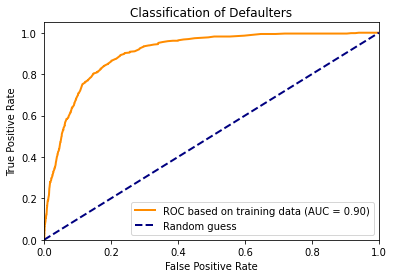

In [ ]:
#ROC curve on training data
#%matplotlib inline

#Next we plot the ROC curve:
roc_vs = roc_curve(casos_sept['Egreso_Num'], logit2_prediction)
auc_vs = auc( roc_vs[0], roc_vs[1] )

plt.figure()
line_width = 2
plt.plot(roc_vs[0], roc_vs[1], color='darkorange', lw=line_width,
         label=f"ROC based on training data (AUC = {auc_vs:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

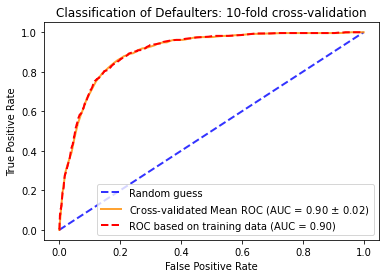

In [ ]:
#Generate cross-validated ROC and AUC for logistic regression model
#on the training set

def cv_roc(X, y, n_split):
    
    cv = StratifiedKFold(n_split)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    for train, test in cv.split(X, y):
        logit = sm.Logit(y.iloc[train], X.iloc[train])
        logit_res = logit.fit(disp=0)
        probas_ = logit_res.predict(X.iloc[test])
        # Compute ROC curve and area under the curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    
    return tprs, aucs, mean_fpr

# plot the cross-validated ROC for 10-fold cv

tprs_vs, aucs_vs, mean_fpr_vs = cv_roc(df_log, casos_sept["Egreso_Num"], 10)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='blue', label='Random guess', alpha=.8)

mean_tpr_vs = np.mean(tprs_vs, axis=0)
mean_tpr_vs[-1] = 1.0

mean_auc_vs = auc(mean_fpr_vs, mean_tpr_vs)
std_auc_vs = np.std(aucs_vs)

plt.plot(mean_fpr_vs, mean_tpr_vs, color='darkorange', lw=2, alpha=.8,
         label=f"Cross-validated Mean ROC (AUC = {mean_auc_vs:0.2f} $\pm$ {std_auc_vs:0.2f})")

plt.plot(roc_vs[0], roc_vs[1], color='red', linestyle='--', lw=line_width,
         label=f"ROC based on training data (AUC = {auc_vs:0.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('Classification of Defaulters: 10-fold cross-validation')
plt.show()

In [ ]:
#Accuracy on the test set

y_train = casos_sept["Egreso_Num"]
y_test = casos_oct["Egreso_Num"]
y_pred_train = logit2_res.predict(df_log)

casos_oct["Edad_2"]=casos_oct["Edad"]-70
df_log_test=casos_oct[['Intercept',
                      'Edad_2', 
                      'diabetes',
                      'cancer', 
                      'obesidad', 
                      'ins_renal', 
                      'enf_card']]

y_pred_test = logit2_res.predict(df_log_test)

#tTaking threshold of clssification s 0.5
y_pred_train2 = y_pred_train.apply(lambda p : 0 if p<0.5 else 1)
y_pred_test2 = y_pred_test.apply(lambda p : 0 if p<0.5 else 1)

print(f"Accuracy in training set: {accuracy_score(y_train, y_pred_train2)}")
print(f"Accuracy in test set: {accuracy_score(y_test, y_pred_test2)}")


Accuracy in training set: 0.9449779685911196
Accuracy in test set: 0.9624300559552358


*Finally, we will compare this model with a Random Forest model and a Naive Bayes Classifier model*

#### Random Forest

In [ ]:
#Random forest model training
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
clf_rf.fit(df_log, casos_sept["Egreso_Num"])

#ROC curve of test set
clf_rf_probas = clf_rf.predict_proba(df_log_test)

roc_p = roc_curve(casos_oct["Egreso_Num"], clf_rf_probas[:,1])
auc_p = auc_p = auc( roc_p[0], roc_p[1] )

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width,
         label=f"ROC curve for Random Forest Classifier(AUC = {auc_p:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

#### Naive Bayes Classifier

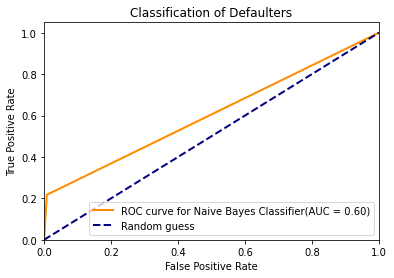

In [ ]:
#Naive Bayes model training
clf_nb = CategoricalNB()
clf_nb.fit(df_log.drop(["Intercept","Edad_2"], axis=1), casos_sept["Egreso_Num"])

#ROC curve of test set
clf_nb_probas = clf_nb.predict(df_log_test.drop(["Intercept","Edad_2"], axis=1))

roc_p = roc_curve(y_test, clf_nb_probas)
auc_p = auc_p = auc( roc_p[0], roc_p[1] )

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange', lw=line_width,
         label=f"ROC curve for Naive Bayes Classifier(AUC = {auc_p:0.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

## Time Series Analysis

In [ ]:
%matplotlib inline
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
#import statsmodels.api as sm  
#from statsmodels.tsa.stattools import acf  
#from statsmodels.tsa.stattools import pacf
#from statsmodels.tsa.seasonal import seasonal_decompose
#import chart_studio as ply
import plotly.offline as py
import cufflinks as cf
from plotly.offline import init_notebook_mode, plot_mpl 
import matplotlib.pyplot as plt
#from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
import plotly.express as px
from autoplot import *

autoplot v0.3.9


In [ ]:
data = pd.read_csv(path+'positivos.csv', index_col=0)
data.tail()

Cases
Date             
20/09/2020    226
21/09/2020    100
22/09/2020    225
23/09/2020    167
24/09/2020    120

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 9 Text major ticklabel objects>)

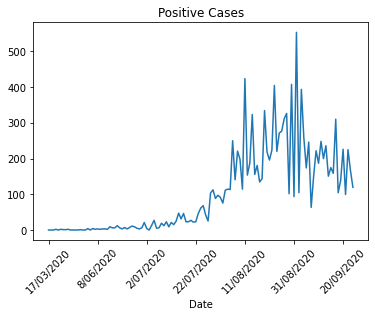

In [ ]:
df = data.copy()
data.plot(title="Positive Cases", legend = None)
plt.xticks(rotation=45)

<Figure size 1440x504 with 0 Axes>

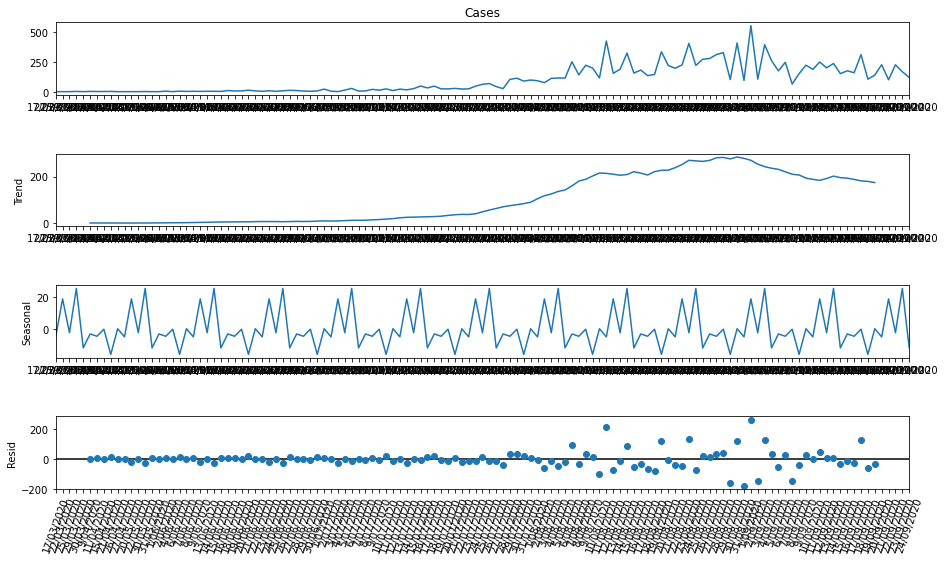

In [ ]:
decomposition = seasonal_decompose(df.Cases, period=10)  
fig = plt.figure(figsize=(20,7))  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
fig = plt.xticks(rotation=70)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df.Cases, trend='n', order=(0,1,0), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())

C:\Users\luz.vanegas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\luz.vanegas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\luz.vanegas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\luz.vanegas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\luz.vanegas\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning:

Non-invertible starting

                                      SARIMAX Results                                       
Dep. Variable:                                Cases   No. Observations:                  125
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -693.590
Date:                              Sat, 14 Nov 2020   AIC                           1391.179
Time:                                      20:43:37   BIC                           1396.616
Sample:                                           0   HQIC                          1393.385
                                              - 125                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9814      1.034     -0.949      0.342      -3.008       1.045
sigma2      1.112e+

In [ ]:
mod = sm.tsa.statespace.SARIMAX(df.Cases, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

C:\Users\luz.vanegas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\luz.vanegas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

C:\Users\luz.vanegas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\luz.vanegas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



                                      SARIMAX Results                                       
Dep. Variable:                                Cases   No. Observations:                  125
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -693.552
Date:                              Sat, 14 Nov 2020   AIC                           1393.104
Time:                                      20:43:50   BIC                           1401.260
Sample:                                           0   HQIC                          1396.413
                                              - 125                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0276      0.145      0.191      0.848      -0.256       0.311
ma.S.L12      -0.98

In [ ]:
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1376.193, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1506.998, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1405.282, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1406.687, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1505.009, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1377.481, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1377.747, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1383.415, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1380.034, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1377.211, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1375.116, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1406.059, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1403.386, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1376.249, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [ ]:
train = data.loc['17/03/2020':'10/09/2020']
test = data.loc['11/09/2020':]
test.shape

(14, 1)

In [ ]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=14)
print(future_forecast)

[186.04163767 186.60053622 186.27459729 186.46467863 186.35382684
 186.41847348 186.3807728  186.40275911 186.38993711 186.39741466
 186.3930539  186.39559701 186.39411391 186.39497883]


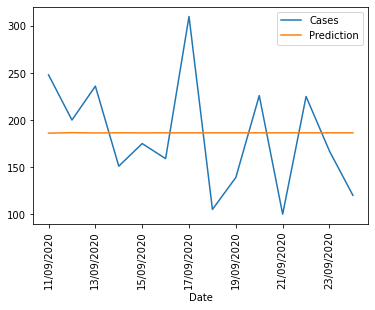

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
c = pd.concat([test,future_forecast],axis=1).plot()
c.tick_params(axis='x', rotation=90)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1221.175, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1339.547, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1244.997, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1249.848, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1337.576, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1222.823, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1222.629, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1223.160, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1222.734, Time=0.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1221.365, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1224.697, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1224.173, Time=0.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1219.773, Time=0.82 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1206.401, Time=0.73 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

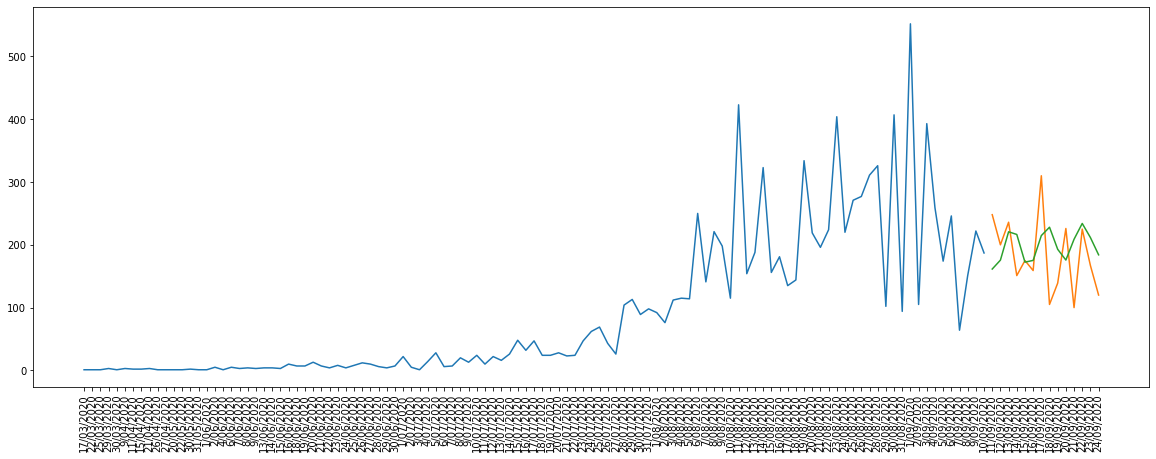

In [ ]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model = model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.figure(figsize=(20,7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
degrees = 90
plt.xticks(rotation=degrees)
plt.show()

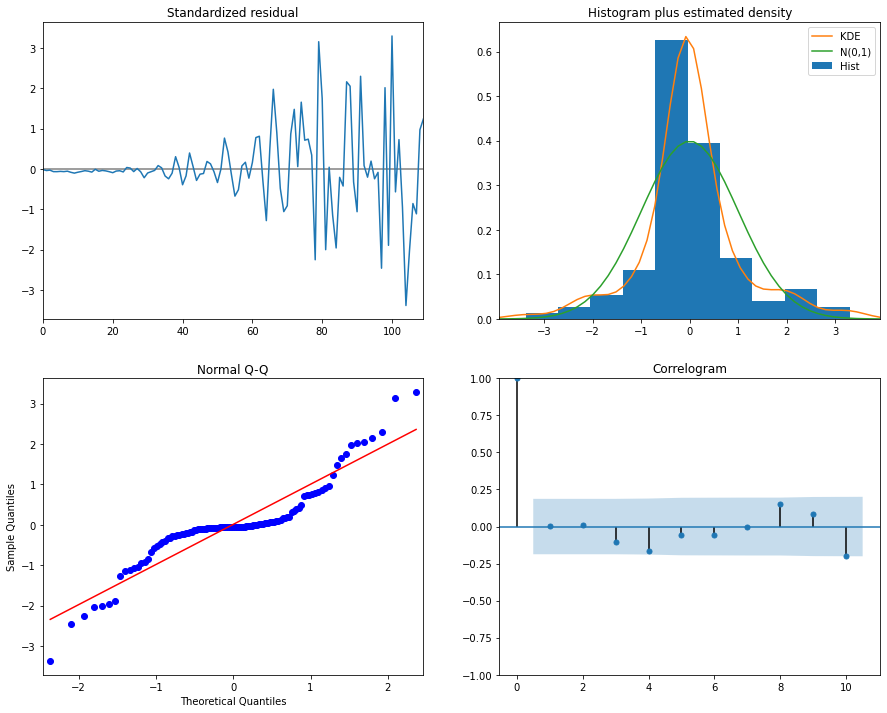

In [ ]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
from arch.unitroot import ADF
adf = ADF(data1.values)
print(adf.summary().as_text())

In [ ]:
adf.lags = 5
print(adf.summary().as_text())

In [ ]:
adf.trend = 'ct'
print(adf.summary().as_text())

In [ ]:
reg_res = adf.regression
print(reg_res.summary().as_text())

In [ ]:
resids = pd.DataFrame(reg_res.resid)
resids.index = data1.index[6:]
resids.columns = ['resids']
fig = resids.plot()
fig = plt.xticks(rotation=70)

In [ ]:
acf = pd.DataFrame(sm.tsa.stattools.acf(reg_res.resid), columns=['ACF'])
fig = acf[1:].plot(kind='bar', title='Residual Autocorrelations')

In [ ]:
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(data1)
print(pp.summary().as_text())

In [ ]:
def stationarity_check(ts):
    # Determing rolling statistics
    roll_mean = ts.rolling(12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

In [ ]:
stationarity_check(data1)

In [ ]:
from statsmodels.tsa.stattools import kpss
def kpss_test(data, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(data, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(data)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(data1, lags=50)
plot_pacf(data1, lags=50)
plt.xlabel('lags')
plt.show()

## SIR Model

In [ ]:
sir = pd.read_excel(path+'Modelo SIR.xlsx')

In [ ]:
sir = sir.rename(columns = {'dia':'day','Casos':'Observed','I':'Forecast'})
sir.head()

day  cases         S   Forecast           R  .id
0    1      1  6.597116  57.713057  935.689827    1
1    2      0  0.628187  24.159924  975.211889    1
2    3      0  0.250595   9.092205  990.657200    1
3    4      0  0.177680   3.386130  996.436190    1
4    5      0  0.156349   1.257982  998.585669    1

In [ ]:
a = pd.melt(sir, id_vars=['day'], value_vars=['cases', 'Forecast'])
a

day  variable         value
0      1     cases  1.000000e+00
1      2     cases  0.000000e+00
2      3     cases  0.000000e+00
3      4     cases  0.000000e+00
4      5     cases  0.000000e+00
..   ...       ...           ...
379  188  Forecast  2.747000e-58
380  189  Forecast  1.379450e-58
381  190  Forecast  6.927124e-59
382  191  Forecast  3.478565e-59
383  192  Forecast  1.746817e-59

[384 rows x 3 columns]

In [ ]:
px.line(a, x='day', y='value',color='variable')

*As noted, the SIR model does not generate very good predictions and that is why it is decided to make another model that has better results in case prediction.*

## Spatio-temporal Disease Mapping

In [ ]:
forecast = pd.read_excel(path+'Pronosticos STDM.xlsx')
forecast.head()

ID_Comuna Nombre Comuna      Fecha  Pronóstico  Observado
0          1         NORTE 2020-10-23  775.798385        773
1          1         NORTE 2020-10-24  780.039409        774
2          1         NORTE 2020-10-25  786.876712        775
3          1         NORTE 2020-10-26  794.137344        779
4          1         NORTE 2020-10-27  801.880341        779

In [ ]:
a = pd.melt(forecast, id_vars=['Fecha','Nombre Comuna'], value_vars=['Pronóstico', 'Observado'])
a

Fecha Nombre Comuna    variable       value
0   2020-10-23         NORTE  Pronóstico  775.798385
1   2020-10-24         NORTE  Pronóstico  780.039409
2   2020-10-25         NORTE  Pronóstico  786.876712
3   2020-10-26         NORTE  Pronóstico  794.137344
4   2020-10-27         NORTE  Pronóstico  801.880341
..         ...           ...         ...         ...
165 2020-10-23  LA PEDREGOSA   Observado  262.000000
166 2020-10-24  LA PEDREGOSA   Observado  264.000000
167 2020-10-25  LA PEDREGOSA   Observado  265.000000
168 2020-10-26  LA PEDREGOSA   Observado  267.000000
169 2020-10-27  LA PEDREGOSA   Observado  267.000000

[170 rows x 4 columns]

In [ ]:
b = a.groupby(['Fecha','variable','Nombre Comuna'])['value'].agg('sum').reset_index().rename(columns= {'Fecha':'Date','Nombre Comuna':'Neighborhood'})
b.head(5)

Date   variable        Neighborhood   value
0 2020-10-23  Observado  CABECERA DEL LLANO   829.0
1 2020-10-23  Observado              CENTRO  1157.0
2 2020-10-23  Observado           CIUDADELA   597.0
3 2020-10-23  Observado       GARCIA ROVIRA  1127.0
4 2020-10-23  Observado        LA CONCORDIA   490.0

In [ ]:
import pandas as pd
import plotly.graph_objects as go  
from plotly.subplots import make_subplots

In [ ]:
c = b[b['Neighborhood'] =='SUROCCIDENTE']
c['variable'] = c['variable'].replace(['Observado','Pronóstico'],['Observed','Forecast'])
px.line(c, x='Date', y='value', color='variable', title ='Suroccidente')


<ipython-input-14-0566c0c5bb02>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Database Connection

In [ ]:
import pandas as pd
import psycopg2

In [ ]:
# Function to pass sql to dataframe
def postgresql_to_dataframe(conn, table):
    """
    Tranform a SELECT query into a pandas dataframe
    """
    cursor = conn.cursor()
    try:
        cursor.execute("select * from {};".format(table))
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    
    
    cursor.execute("SELECT column_name FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = '{}';".format(table))
    column_names = [i[0] for i in cursor.fetchall()]  
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [ ]:
## Connection to the Database

try:
    connection = psycopg2.connect(user = "postgres",
                                  password = "AbHOhsjgksaF479g",
                                  host = "35.202.158.183",
                                  port = "5432",
                                  database = "cases")

    cursor = connection.cursor()
    # Print PostgreSQL Connection properties
    print ( connection.get_dsn_parameters(),"\n")

    # Print PostgreSQL version
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record,"\n")

except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)

Error while connecting to PostgreSQL could not connect to server: Connection timed out (0x0000274C/10060)
	Is the server running on host "35.202.158.183" and accepting
	TCP/IP connections on port 5432?



**Casos positivos**

* Table name:  positive_cases


In [ ]:
casos_positivos = postgresql_to_dataframe(connection, "positive_cases")
casos_positivos.head()

**Mortalidad**
* Table name: mortality

In [ ]:
mortality = postgresql_to_dataframe(connection, "mortality")
mortality.head()